In [ ]:
%pip install -r ../requirements.txt

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os

In [6]:
# Directory containing precinct-level data
data_dir = '../data/precinct_results/2020'

In [27]:
# Function to read and process precinct data for a specific state
def process_state_data(state_abbr):
    # Construct the file path for the shapefile
    shapefile_path = os.path.join(data_dir, f"{state_abbr}_2020.shp")
    
    # Read the shapefile
    gdf = gpd.read_file(shapefile_path)
    
    # Ensure the necessary columns exist (adjust if your column names are different)
    # Columns: 'dem_votes' and 'rep_votes' should represent Democratic and Republican votes
    if 'G20PREDBID' not in gdf.columns or 'G20PRERTRU' not in gdf.columns:
        raise ValueError(f"Shapefile for {state_abbr} does not have Biden or Trump vote columns.")
    
    # Calculate net voteshare
    gdf['net_voteshare'] = (gdf['G20PREDBID'] - gdf['G20PRERTRU']) / (gdf['G20PREDBID'] + gdf['G20PRERTRU'])
    
    return gdf


# Function to plot the precinct-level results
def plot_precinct_results(gdf, state_abbr):
    # Plot the precincts colored by net voteshare
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    gdf.plot(column = 'net_voteshare', cmap = 'RdBu', legend = True, ax = ax,
             legend_kwds = {'label': "Net Voteshare (Democratic - Republican)", 'orientation': 'horizontal'})
    ax.set_title(f"Precinct-Level Net Voteshare - {state_abbr.upper()}, 2020", fontsize=16)
    ax.axis('off')
    plt.show()

# Function to plot high-resolution precinct maps with zoom
def plot_precinct_zoom(gdf, state_abbr, xlim=None, ylim=None, figsize=(16, 12)):
    """
    Plots a high-resolution map of precincts with zoom capabilities.

    Parameters:
        gdf (GeoDataFrame): GeoDataFrame containing precinct data.
        state_abbr (str): State abbreviation for the plot title.
        xlim (tuple): (min, max) x-axis limits for zooming (longitude).
        ylim (tuple): (min, max) y-axis limits for zooming (latitude).
        figsize (tuple): Size of the output figure.
    """
    # Recast CRS
    gdf = gdf.to_crs("EPSG:4326")
    
    # Create the plot
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    gdf.plot(column='net_voteshare', cmap='RdBu', legend=True, ax=ax,
             legend_kwds={'label': "Net Voteshare (Democratic - Republican)", 'orientation': 'horizontal'})
    
    # Set zoom limits if provided
    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)
    
    ax.set_title(f"High-Resolution Precinct Map - {state_abbr.upper()}, 2020", fontsize=16)
    ax.axis('off')
    plt.show()

In [35]:
state_abbr = 'de'

In [36]:
state_gdf = process_state_data(state_abbr)
state_gdf.head()


,PRECINCT,G20PREDBID,G20PRERTRU,G20PRELJOR,G20PREGHAW,G20USSDCOO,G20USSRWIT,G20USSLFRO,G20USSITUR,G20HALDROC,...,G20GOVDCAR,G20GOVRMUR,G20GOVLMAC,G20GOVIDEM,G20LTGDHAL,G20LTGRHAL,G20INSDNAV,G20INSRPIL,geometry,net_voteshare
0,01-21,419,247,7,1,434,222,6,3,397,...,429,225,7,3,418,236,421,227,"POLYGON ((-8424454.124 4829097.736, -8424475.4...",0.258258
1,01-22,838,521,13,7,860,471,14,21,780,...,834,509,11,12,792,558,822,523,"POLYGON ((-8429550.998 4831294.292, -8429550.2...",0.233260
2,01-23,159,51,3,2,158,42,2,4,151,...,158,41,1,3,153,43,149,50,"POLYGON ((-8430893.957 4820503.815, -8430901.4...",0.514286
3,01-24,849,510,25,3,835,454,28,33,810,...,839,474,18,17,844,478,871,453,"POLYGON ((-8426501.624 4816879.406, -8426498.6...",0.249448
4,01-25,629,124,13,7,608,116,12,19,608,...,613,118,6,16,604,137,595,145,"POLYGON ((-8432626.756 4816461.223, -8432630.4...",0.670651


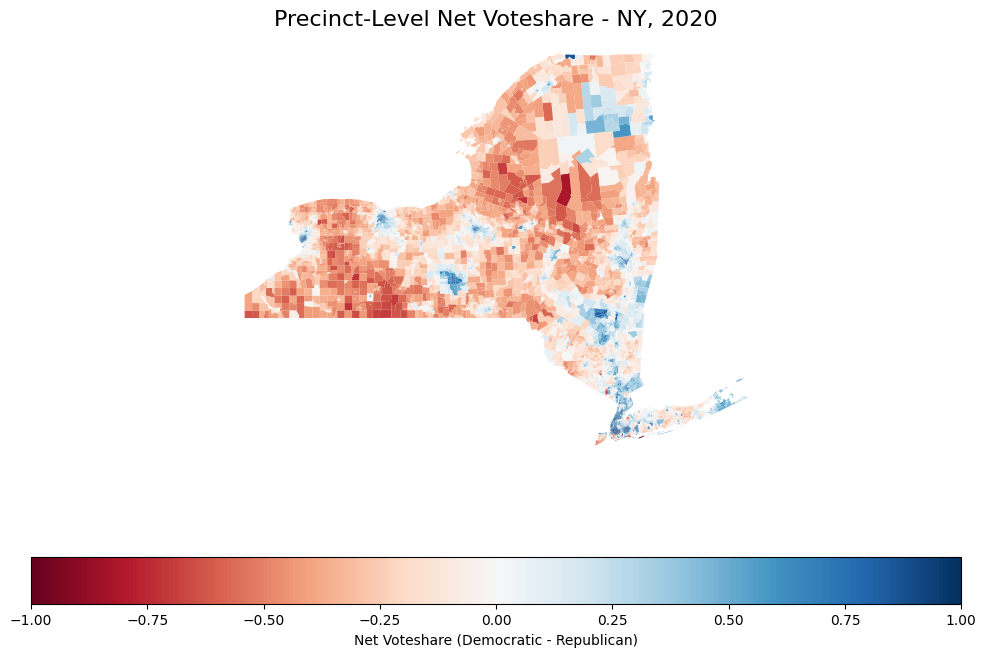

In [30]:
plot_precinct_results(state_gdf, state_abbr)

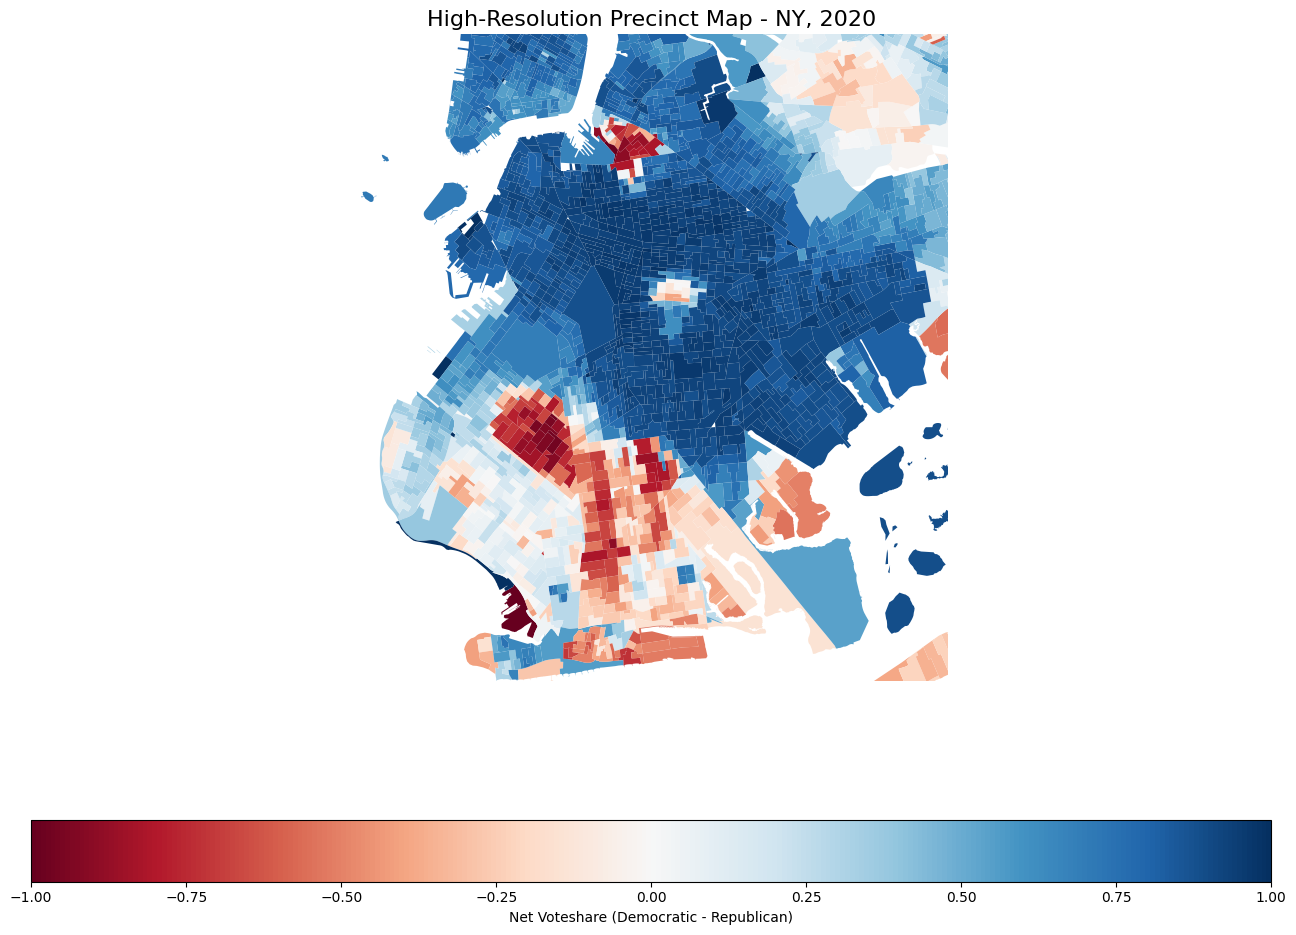

In [32]:
# Zoomed plot (coordinates approximate Manhattan region)
plot_precinct_zoom(
    state_gdf, 
    state_abbr, 
    xlim=(-74.05, -73.85),  # Longitude range for Brooklyn
    ylim=(40.57, 40.73),    # Latitude range for Brooklyn
    figsize=(16, 12)
)

In [25]:
print(state_gdf.crs)


EPSG:3857
